In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
frames = []
for year in range(1970, 2016):
    frames.append(pd.read_json('billboard/data/years/' + str(year) + '.json'))
top_songs = pd.concat(frames, ignore_index=True)
top_songs

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes
0,When you're weary\nFeeling small\nWhen tears a...,"[american, classic pop and rock, contemporary ...",193.5,1,1970,4.0,100.24,160,32,"{'neg': 0.231, 'neu': 0.668, 'pos': 0.101, 'co...",Bridge Over Troubled Water,0.5,Simon and Garfunkel,10,16
1,Why do birds suddenly appear\nEverytime you ar...,"[adult contemporary, baroque pop, classic pop ...",236.7,2,1970,4.0,100.24,203,35,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",(They Long To Be) Close To You,0.5,Carpenters,12,28
2,Raindrops are falling on my head\nAnd just lik...,"[contemporary christian, country, pop, rock, s...",208.8,4,1970,4.8,98.21,180,25,"{'neg': 0.088, 'neu': 0.754, 'pos': 0.158, 'co...",Raindrops Keep Fallin' On My Head,1.3,B.J. Thomas,15,11
3,"War, huh, yeah\nWhat is it good for?\nAbsolute...",[classic pop and rock],430.2,5,1970,4.4,99.23,346,55,"{'neg': 0.291, 'neu': 0.489, 'pos': 0.22, 'com...",War,0.9,Edwin Starr,34,36
4,"Ah, ah, ah\nOoh, ooh\nAh, ah, ah\nOoh, ooh\n\n...","[adult contemporary, american, classic pop and...",476.1,6,1970,4.4,107.69,416,64,"{'neg': 0.045, 'neu': 0.776, 'pos': 0.179, 'co...",Ain't No Mountain High Enough,-0.3,Diana Ross,27,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,(I guess right now you've got the last laugh)\...,"[contemporary r&b, electropop]",570.6,94,2015,5.6,96.18,469,51,"{'neg': 0.041, 'neu': 0.84, 'pos': 0.12, 'comp...",Here,2.1,Alessia Cara,42,13
3284,My face above the water\nMy feet can't touch t...,"[ballad, contemporary r&b, deep house, hip hop...",169.2,95,2015,4.0,91.78,126,22,"{'neg': 0.014, 'neu': 0.801, 'pos': 0.184, 'co...",Waves,1.7,Mr. Probz,15,8
3285,You know from the moment she turned around\nSh...,"[dance, hip hop, hip hop rnb and dance hall]",217.8,97,2015,4.8,106.67,193,26,"{'neg': 0.059000000000000004, 'neu': 0.874, 'p...",She Knows,0.1,Ne-Yo,16,21
3286,Going out tonight\nChanges into something red\...,"[boy band, dance-pop, folk pop, pop, pop rock,...",399.6,98,2015,4.0,83.32,296,52,"{'neg': 0.105, 'neu': 0.869, 'pos': 0.02600000...",Night Changes,2.9,One Direction,31,34


In [3]:
words_to_remove = ['you', 'the', 'and', 'i\'m']
# words_to_remove = []

def count_frequencies(lst):
    d = {}
    for word in lst:
        word = word.lower()
        if len(word) > 2:
            if word in d:
                d[word] = d[word] + 1
            else:
                d[word] = 1
    return d

lyrics_by_year = pd.DataFrame(top_songs)
lyrics_by_year['lyrics'] = lyrics_by_year['lyrics'].str.replace(r'[^a-zA-Z]', " ").str.split(" ")

In [4]:
lyrics_by_year = lyrics_by_year[['year', 'lyrics']].groupby('year').agg(sum)
lyrics_by_year['lyrics'] = lyrics_by_year['lyrics'].map(count_frequencies)

In [5]:
lyrics_by_year

,lyrics
year,
1970,"{'when': 71, 'you': 585, 'weary': 1, 'feeling'..."
1971,"{'jeremiah': 1, 'was': 27, 'bull': 1, 'frog': ..."
1972,"{'the': 635, 'first': 6, 'time': 37, 'ever': 1..."
1973,"{'well': 41, 'the': 569, 'south': 1, 'side': 9..."
1974,"{'memories': 5, 'light': 5, 'the': 719, 'corne..."
1975,"{'love': 206, 'will': 68, 'keep': 41, 'togethe..."
1976,"{'you': 902, 'think': 15, 'that': 189, 'people..."
1977,"{'stay': 19, 'away': 46, 'from': 26, 'window':..."
1978,"{'you': 939, 'got': 107, 'looking': 15, 'that'..."


In [6]:
def graph_for_word(word):
    data = []
    for year in lyrics_by_year.index:
        lyrics = lyrics_by_year.loc[year]['lyrics']
#         print(lyrics)
        if word in lyrics:
#             print(lyrics[word])
            data.append(lyrics[word])
        else:
            data.append(0)
    plt.plot(lyrics_by_year.index, data)
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title('Frequency of ' + r"$\bf{" + word + "}$" + ' in Billboard top 100 songs, 1980 - 2015')
    plt.show()

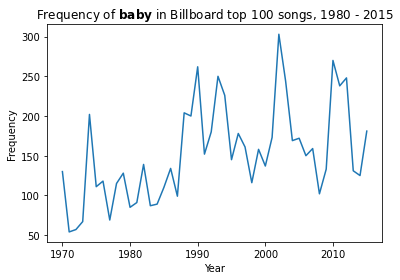

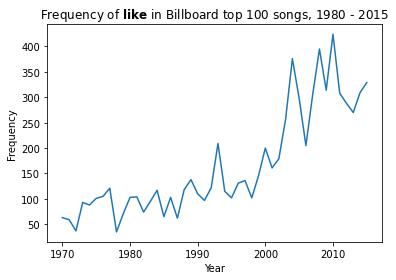

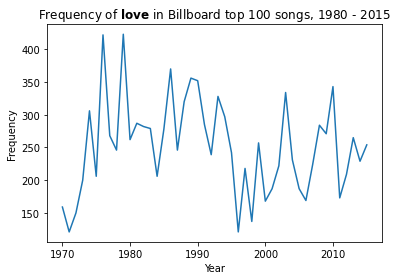

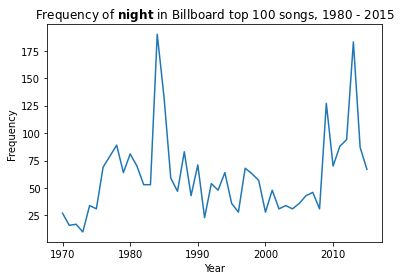

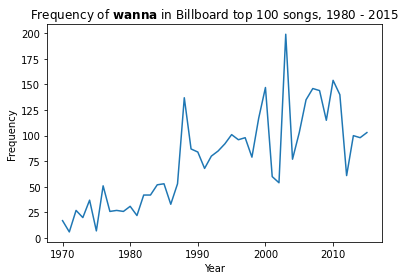

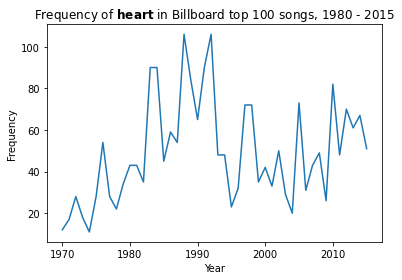

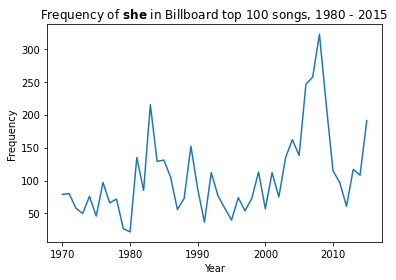

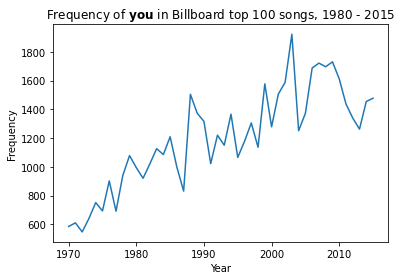

In [7]:
graph_for_word('baby')
graph_for_word('like')
graph_for_word('love')
graph_for_word('night')
graph_for_word('wanna')
graph_for_word('heart')
graph_for_word("she")
graph_for_word("you")

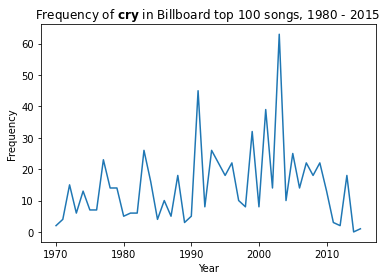

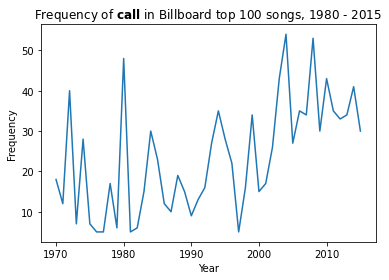

In [8]:
graph_for_word('cry')
graph_for_word('call')

In [9]:
from heapq import nlargest
def getTenHighest(d):
    return nlargest(10, d, key=lambda x: d[x])

it = lyrics_by_year.itertuples()
tenByYear = {}
try:
    while True:
        lyr = next(it)[1]
        print(getTenHighest(lyr))
except StopIteration:
    pass

['you', 'the', 'and', 'that', 'love', 'your', 'baby', 'can', 'all', 'just']
['you', 'the', 'and', 'what', 'know', 'love', 'don', 'just', 'can', 'your']
['the', 'you', 'and', 'love', 'your', 'that', 'all', 'can', 'there', 'don']
['you', 'the', 'and', 'love', 'that', 'yeah', 'can', 'with', 'your', 'all']
['you', 'the', 'and', 'love', 'that', 'baby', 'your', 'get', 'down', 'don']
['you', 'the', 'and', 'love', 'can', 'with', 'that', 'baby', 'your', 'like']
['you', 'the', 'love', 'and', 'your', 'that', 'with', 'ooh', 'all', 'gonna']
['you', 'the', 'and', 'love', 'don', 'your', 'can', 'for', 'that', 'like']
['you', 'the', 'and', 'love', 'can', 'that', 'all', 'your', 'don', 'know']
['you', 'the', 'and', 'love', 'don', 'can', 'that', 'your', 'know', 'all']
['you', 'the', 'and', 'love', 'don', 'that', 'your', 'for', 'let', 'all']
['you', 'the', 'and', 'love', 'your', 'don', 'that', 'all', 'for', 'can']
['you', 'the', 'and', 'love', 'your', 'can', 'that', 'get', 'don', 'for']
['you', 'the', 'and

In [10]:
"num_words"

'num_words'

In [11]:
print(top_songs['tags'][0])

['american', 'classic pop and rock', 'contemporary folk', 'film soundtrack', 'folk', 'folk pop', 'folk rock', 'pop rock', 'rock', 'seven', 'simon-garfunkel', 'singer/songwriter']


In [12]:
top_songs.columns

Index(['lyrics', 'tags', 'num_syllables', 'pos', 'year', 'fog_index',
       'flesch_index', 'num_words', 'num_lines', 'sentiment', 'title',
       'f_k_grade', 'artist', 'difficult_words', 'num_dupes'],
      dtype='object')

In [13]:
top_songs['positivity'] = [d['pos'] for d in top_songs['sentiment']]
top_songs['negativity'] = [d['neg'] for d in top_songs['sentiment']]
top_songs['neutrality'] = [d['neu'] for d in top_songs['sentiment']]
top_songs['difficulty_percentage'] = top_songs['difficult_words'] / top_songs['num_words']
top_songs

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes,positivity,negativity,neutrality,difficulty_percentage
0,"[When, you, re, weary, Feeling, small, When, t...","[american, classic pop and rock, contemporary ...",193.5,1,1970,4.0,100.24,160,32,"{'neg': 0.231, 'neu': 0.668, 'pos': 0.101, 'co...",Bridge Over Troubled Water,0.5,Simon and Garfunkel,10,16,0.101,0.231,0.668,0.062500
1,"[Why, do, birds, suddenly, appear, Everytime, ...","[adult contemporary, baroque pop, classic pop ...",236.7,2,1970,4.0,100.24,203,35,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",(They Long To Be) Close To You,0.5,Carpenters,12,28,0.134,0.000,0.866,0.059113
2,"[Raindrops, are, falling, on, my, head, And, j...","[contemporary christian, country, pop, rock, s...",208.8,4,1970,4.8,98.21,180,25,"{'neg': 0.088, 'neu': 0.754, 'pos': 0.158, 'co...",Raindrops Keep Fallin' On My Head,1.3,B.J. Thomas,15,11,0.158,0.088,0.754,0.083333
3,"[War, , huh, , yeah, What, is, it, good, for, ...",[classic pop and rock],430.2,5,1970,4.4,99.23,346,55,"{'neg': 0.291, 'neu': 0.489, 'pos': 0.22, 'com...",War,0.9,Edwin Starr,34,36,0.220,0.291,0.489,0.098266
4,"[Ah, , ah, , ah, Ooh, , ooh, Ah, , ah, , ah, O...","[adult contemporary, american, classic pop and...",476.1,6,1970,4.4,107.69,416,64,"{'neg': 0.045, 'neu': 0.776, 'pos': 0.179, 'co...",Ain't No Mountain High Enough,-0.3,Diana Ross,27,28,0.179,0.045,0.776,0.064904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,"[, I, guess, right, now, you, ve, got, the, la...","[contemporary r&b, electropop]",570.6,94,2015,5.6,96.18,469,51,"{'neg': 0.041, 'neu': 0.84, 'pos': 0.12, 'comp...",Here,2.1,Alessia Cara,42,13,0.120,0.041,0.840,0.089552
3284,"[My, face, above, the, water, My, feet, can, t...","[ballad, contemporary r&b, deep house, hip hop...",169.2,95,2015,4.0,91.78,126,22,"{'neg': 0.014, 'neu': 0.801, 'pos': 0.184, 'co...",Waves,1.7,Mr. Probz,15,8,0.184,0.014,0.801,0.119048
3285,"[You, know, from, the, moment, she, turned, ar...","[dance, hip hop, hip hop rnb and dance hall]",217.8,97,2015,4.8,106.67,193,26,"{'neg': 0.059000000000000004, 'neu': 0.874, 'p...",She Knows,0.1,Ne-Yo,16,21,0.067,0.059,0.874,0.082902
3286,"[Going, out, tonight, Changes, into, something...","[boy band, dance-pop, folk pop, pop, pop rock,...",399.6,98,2015,4.0,83.32,296,52,"{'neg': 0.105, 'neu': 0.869, 'pos': 0.02600000...",Night Changes,2.9,One Direction,31,34,0.026,0.105,0.869,0.104730


In [14]:
averages = top_songs.groupby('year').mean()

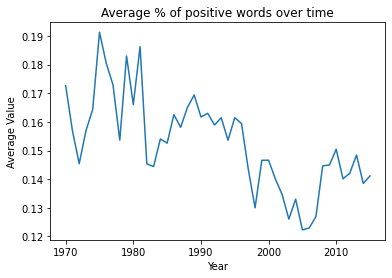

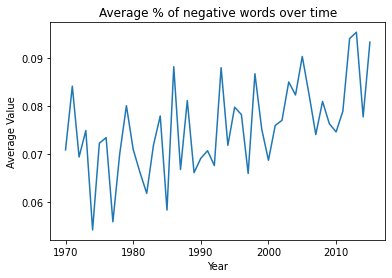

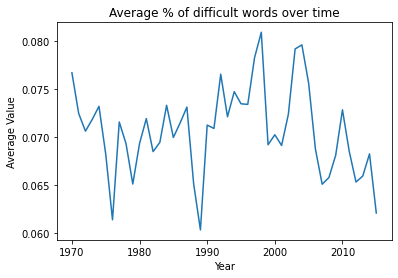

In [15]:
def plot_average_for_column(column, title):
    plt.plot(averages.index, averages[column])
    plt.xlabel('Year')
    plt.ylabel('Average Value')
    plt.title(title)
    plt.show()

plot_average_for_column('positivity', 'Average % of positive words over time')
plot_average_for_column('negativity', 'Average % of negative words over time')
plot_average_for_column('difficulty_percentage', 'Average % of difficult words over time')

In [16]:
top_songs['hip_hop'] = [('hip hop' in tags) for tags in top_songs['tags']]

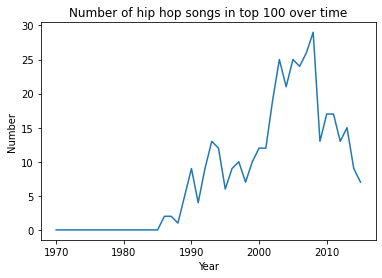

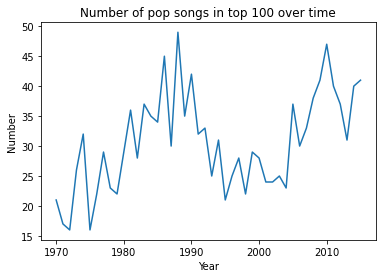

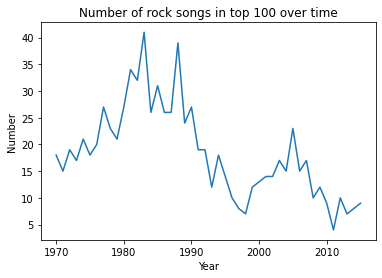

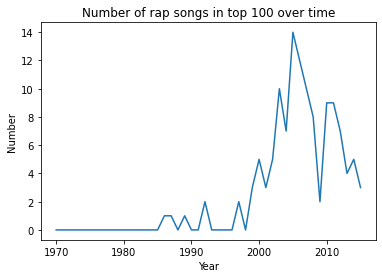

In [17]:
def plot_by_genre(genre, genre_name):
    top_songs[genre] = [(genre_name in tags) for tags in top_songs['tags']]
    counted = top_songs.groupby('year').sum()
    plt.plot(counted.index, counted[genre])
    plt.xlabel('Year')
    plt.ylabel('Number')
    plt.title('Number of ' + genre_name + ' songs in top 100 over time')
    plt.show()
    
plot_by_genre('hip_hop', 'hip hop')
plot_by_genre('pop', 'pop')
plot_by_genre('rock', 'rock')
plot_by_genre('rap', 'rap')

No handles with labels found to put in legend.


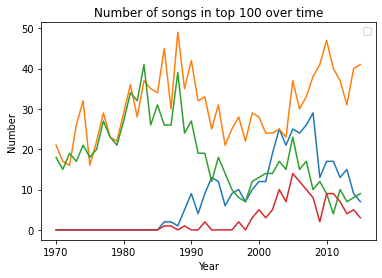

In [18]:
def plot_by_genre(genre, genre_name):
    top_songs[genre] = [(genre_name in tags) for tags in top_songs['tags']]
    counted = top_songs.groupby('year').sum()
    plt.plot(counted.index, counted[genre])
    
plot_by_genre('hip_hop', 'hip hop')
plot_by_genre('pop', 'pop')
plot_by_genre('rock', 'rock')
plot_by_genre('rap', 'rap')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of songs in top 100 over time')
plt.legend()

plt.show()

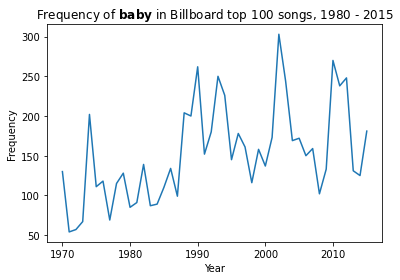

In [20]:
graph_for_word('baby')